In [1]:
import torch
import re
import os
import numpy as np
import torchvision
import torch.nn as nn  
from PIL import Image  
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset,DataLoader
import random
from matplotlib import pyplot as plt
from collections import Counter
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
transform = transforms.Compose([ 
    transforms.ColorJitter(brightness=0.5,contrast=0.5,saturation=0.5,hue=0.5),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(size=224,scale=(0.5,1),ratio=(0.5,2)),   
    transforms.ToTensor(),  
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
]) 

In [3]:
data_path = "./lfw"
namedict = {}
idx = 0
pathlist = list(map(lambda x: '\\'.join([data_path, x]), os.listdir(data_path)))
for item in pathlist:
    img_list = os.listdir(item)
    if len(img_list)>30:
        for picpath in img_list:
            img = Image.open(os.path.join(item, picpath))
            
        namedict[str(idx)] = item.split('\\')[-1]
        idx += 1
        namedict[str(idx)] = item.split('\\')[-1]
        idx += 1
        
print('总共有{}人，分别是'.format(int(len(namedict)/2)))    
for key,value in namedict.items():
    if int(key)% 2 != 0:
        print(value)

总共有32人，分别是
Alejandro_Toledo
Alvaro_Uribe
Andre_Agassi
Ariel_Sharon
Arnold_Schwarzenegger
Colin_Powell
David_Beckham
Donald_Rumsfeld
George_W_Bush
Gerhard_Schroeder
Gloria_Macapagal_Arroyo
Hans_Blix
Hugo_Chavez
Jacques_Chirac
Jean_Chretien
Jennifer_Capriati
John_Ashcroft
John_Negroponte
Junichiro_Koizumi
Kofi_Annan
Laura_Bush
Lleyton_Hewitt
Luiz_Inacio_Lula_da_Silva
Megawati_Sukarnoputri
Nestor_Kirchner
Roh_Moo-hyun
Serena_Williams
Silvio_Berlusconi
Tom_Ridge
Tony_Blair
Vicente_Fox
Vladimir_Putin


In [4]:
# 加载模型  
model = torch.load('recognition.pth')

C:\Users\15572\AppData\Local\Temp\ipykernel_19320\2774443462.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('recognition.pth')


In [5]:
#从原图集中获取20张图片进行预测
True_nums = 0
for i in range(20):
    random_key = random.choice(list(namedict.keys()))
    # print(random_key)
    random_name = namedict[str(random_key)]
    # print(random_name)
    random_img = random.choice(os.listdir(os.path.join(data_path, random_name)))
    # print(random_img)
    random_name_img = Image.open(os.path.join(data_path, random_name,random_img)).convert('RGB')
    # print(random_name_img)
#     plt.imshow(random_name_img)
    
    image_tensor = transform(random_name_img)
    image_tensor = image_tensor.unsqueeze(0)
    
    # 进行预测  
    with torch.no_grad():  
        output = model(image_tensor)  

    # 解析输出 
    _, predicted = torch.max(output, 1)  
    predicted_class = predicted.item()
    if re.match(namedict[str(predicted_class)], random_name):
        True_nums +=1
    
    print(f'轮数（epoch） :{i+1}')
    print(f'预测值（Predicted）: {namedict[str(predicted_class)]}')
    # print(f'Predicted_key: {predicted_class}')
    print(f'真实值（Realy）: {random_name}\n')
    
print("{:-^50}".format("split line"))
print(f'总共进行预测了20次,其中有{True_nums}次预测正确')

轮数（epoch） :1
预测值（Predicted）: Alvaro_Uribe
真实值（Realy）: Alvaro_Uribe

轮数（epoch） :2
预测值（Predicted）: Arnold_Schwarzenegger
真实值（Realy）: Arnold_Schwarzenegger

轮数（epoch） :3
预测值（Predicted）: Silvio_Berlusconi
真实值（Realy）: Silvio_Berlusconi

轮数（epoch） :4
预测值（Predicted）: John_Negroponte
真实值（Realy）: John_Negroponte

轮数（epoch） :5
预测值（Predicted）: David_Beckham
真实值（Realy）: David_Beckham

轮数（epoch） :6
预测值（Predicted）: John_Negroponte
真实值（Realy）: John_Negroponte

轮数（epoch） :7
预测值（Predicted）: Tony_Blair
真实值（Realy）: Tony_Blair

轮数（epoch） :8
预测值（Predicted）: Silvio_Berlusconi
真实值（Realy）: Silvio_Berlusconi

轮数（epoch） :9
预测值（Predicted）: Nestor_Kirchner
真实值（Realy）: Nestor_Kirchner

轮数（epoch） :10
预测值（Predicted）: Ariel_Sharon
真实值（Realy）: Silvio_Berlusconi

轮数（epoch） :11
预测值（Predicted）: Jacques_Chirac
真实值（Realy）: Jacques_Chirac

轮数（epoch） :12
预测值（Predicted）: Serena_Williams
真实值（Realy）: Serena_Williams

轮数（epoch） :13
预测值（Predicted）: David_Beckham
真实值（Realy）: David_Beckham

轮数（epoch） :14
预测值（Predicted）: John_Negrop

In [6]:
# 读取磁盘中的一张特定图片进行多次预测
def predict_image_in_file(specific_image_path, epoch):
    image_name = os.path.basename(specific_image_path)
    person_name = os.path.splitext(image_name)[0]
    specific_image = Image.open(specific_image_path).convert('RGB')
    # 显示读取的图片
    plt.imshow(specific_image)
    plt.title(person_name)
    plt.show()
    
    predictions = []
    for _ in range(epoch):
        specific_image_tensor = transform(specific_image)
        specific_image_tensor = specific_image_tensor.unsqueeze(0)
        with torch.no_grad():
            specific_output = model(specific_image_tensor)
        _, specific_predicted = torch.max(specific_output, 1)
        predictions.append(specific_predicted.item())
    
    counter = Counter(predictions)
    most_common_prediction = counter.most_common(1)[0]
    prediction_label = namedict[str(most_common_prediction[0])]
    occurrence_count = most_common_prediction[1]
    
    print(f"预测结果为: {prediction_label}，在{epoch}次预测中出现了{occurrence_count}次。")
    # 根据预测结果获取对应人物文件夹下的随机一张图片并展示
    predicted_person_folder = os.path.join(data_path, prediction_label)
    random_image_path = random.choice(os.listdir(predicted_person_folder))
    random_image_full_path = os.path.join(predicted_person_folder, random_image_path)

    random_image = Image.open(random_image_full_path).convert('RGB')
    print("对应结果图片")
    plt.imshow(random_image)
    plt.title(prediction_label)
    plt.show()

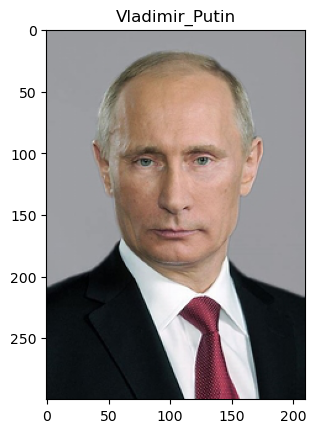

预测结果为: Vladimir_Putin，在20次预测中出现了18次。
对应结果图片


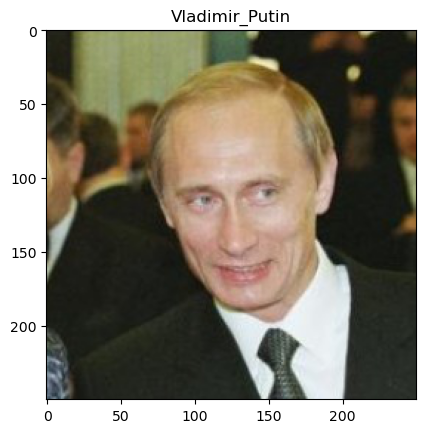

In [7]:
specific_image_path = "./test/Vladimir_Putin.jpg"
predict_image_in_file(specific_image_path,20)

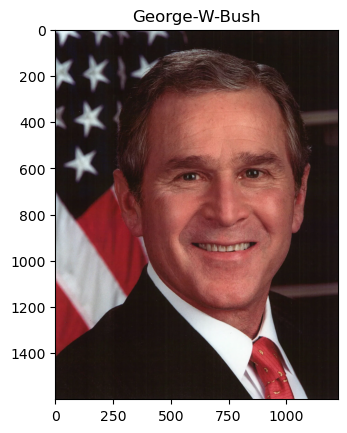

预测结果为: George_W_Bush，在20次预测中出现了17次。
对应结果图片


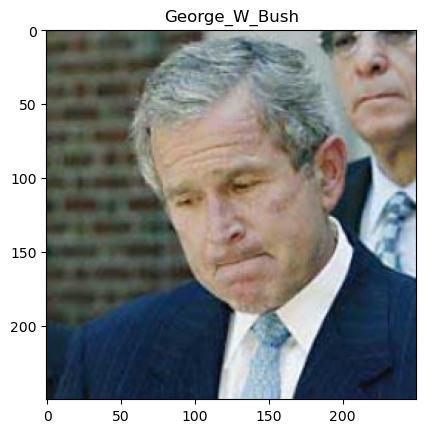

In [8]:
specific_image_path = "./test/George-W-Bush.jpg"
predict_image_in_file(specific_image_path,20)

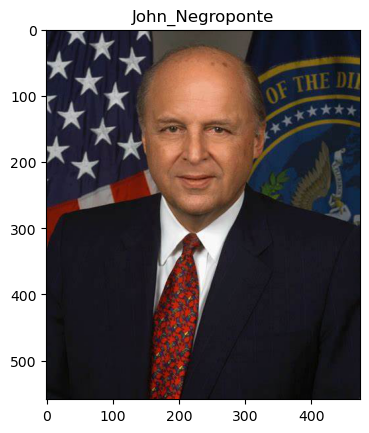

预测结果为: John_Negroponte，在20次预测中出现了15次。
对应结果图片


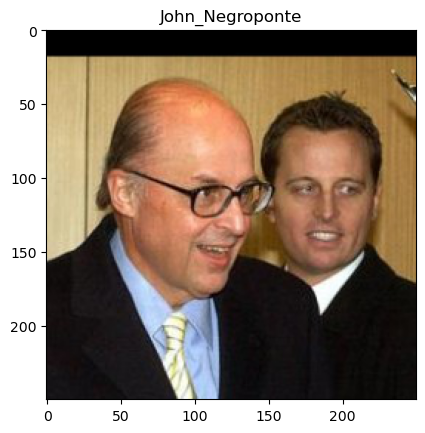

In [9]:
specific_image_path = "./test/John_Negroponte.jpg"
predict_image_in_file(specific_image_path,20)

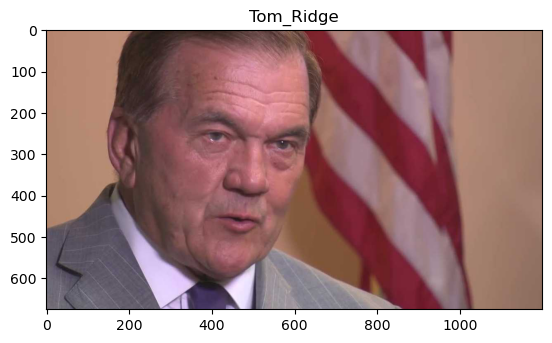

预测结果为: Tom_Ridge，在50次预测中出现了22次。
对应结果图片


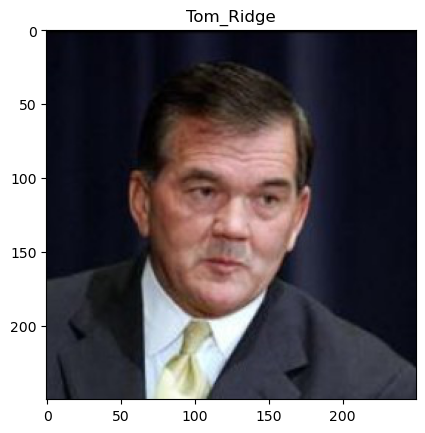

In [10]:
specific_image_path = "./test/Tom_Ridge.jpg"
predict_image_in_file(specific_image_path,50)